In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
os.listdir(".")

['.ipynb_checkpoints', 'sonar .ipynb', 'sonar.csv']

In [3]:
sonar_df = pd.read_csv("sonar.csv",header=None)
sonar_df = sonar_df.sample(frac=1)
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
144,0.0299,0.0688,0.0992,0.1021,0.0800,0.0629,0.0130,0.0813,0.1761,0.0998,...,0.0459,0.0277,0.0172,0.0087,0.0046,0.0203,0.0130,0.0115,0.0015,M
152,0.0131,0.0201,0.0045,0.0217,0.0230,0.0481,0.0742,0.0333,0.1369,0.2079,...,0.0168,0.0086,0.0045,0.0062,0.0065,0.0030,0.0066,0.0029,0.0053,M
199,0.0116,0.0744,0.0367,0.0225,0.0076,0.0545,0.1110,0.1069,0.1708,0.2271,...,0.0141,0.0103,0.0100,0.0034,0.0026,0.0037,0.0044,0.0057,0.0035,M
46,0.0308,0.0339,0.0202,0.0889,0.1570,0.1750,0.0920,0.1353,0.1593,0.2795,...,0.0167,0.0127,0.0138,0.0090,0.0051,0.0029,0.0122,0.0056,0.0020,R
60,0.0130,0.0006,0.0088,0.0456,0.0525,0.0778,0.0931,0.0941,0.1711,0.1483,...,0.0078,0.0041,0.0013,0.0011,0.0045,0.0039,0.0022,0.0023,0.0016,R


In [4]:
#label = sonar_df[sonar_df.columns[len(sonar_df.columns)-1]]
label = sonar_df.iloc[:,-1:]
label

,60
144,M
152,M
199,M
46,R
60,R
...,...
187,M
10,R
182,M
137,M


In [5]:
# converting column to flatten array
label = np.ravel(label)
print(label)

['M' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'M' 'R' 'R'
 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'R' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'M'
 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'R'
 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'R'
 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'M'
 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'R' 'M'
 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'R' 'M' 'M'
 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'R' 'R' 'R' 'M'
 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'M' 'M'
 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'R'
 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'M' 'R' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'M'
 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'M']


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#le.fit_transform(label,label)
label = le.fit_transform(label)

In [7]:
print(type(label))
print(label)

<class 'numpy.ndarray'>
[0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1
 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0
 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1
 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0]


In [8]:
label = label.astype('float')
print(label)
print(type(label))

[0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
<class 'numpy.ndarray'>


In [9]:
variety = sonar_df.iloc[:, :-1]
variety

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
144,0.0299,0.0688,0.0992,0.1021,0.0800,0.0629,0.0130,0.0813,0.1761,0.0998,...,0.0342,0.0459,0.0277,0.0172,0.0087,0.0046,0.0203,0.0130,0.0115,0.0015
152,0.0131,0.0201,0.0045,0.0217,0.0230,0.0481,0.0742,0.0333,0.1369,0.2079,...,0.0111,0.0168,0.0086,0.0045,0.0062,0.0065,0.0030,0.0066,0.0029,0.0053
199,0.0116,0.0744,0.0367,0.0225,0.0076,0.0545,0.1110,0.1069,0.1708,0.2271,...,0.0202,0.0141,0.0103,0.0100,0.0034,0.0026,0.0037,0.0044,0.0057,0.0035
46,0.0308,0.0339,0.0202,0.0889,0.1570,0.1750,0.0920,0.1353,0.1593,0.2795,...,0.0070,0.0167,0.0127,0.0138,0.0090,0.0051,0.0029,0.0122,0.0056,0.0020
60,0.0130,0.0006,0.0088,0.0456,0.0525,0.0778,0.0931,0.0941,0.1711,0.1483,...,0.0092,0.0078,0.0041,0.0013,0.0011,0.0045,0.0039,0.0022,0.0023,0.0016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.0368,0.0279,0.0103,0.0566,0.0759,0.0679,0.0970,0.1473,0.2164,0.2544,...,0.0151,0.0105,0.0024,0.0018,0.0057,0.0092,0.0009,0.0086,0.0110,0.0052
10,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036
182,0.0095,0.0308,0.0539,0.0411,0.0613,0.1039,0.1016,0.1394,0.2592,0.3745,...,0.0357,0.0181,0.0019,0.0102,0.0133,0.0040,0.0042,0.0030,0.0031,0.0033
137,0.0430,0.0902,0.0833,0.0813,0.0165,0.0277,0.0569,0.2057,0.3887,0.7106,...,0.0208,0.0176,0.0197,0.0210,0.0141,0.0049,0.0027,0.0162,0.0059,0.0021


In [10]:
print(type(variety))
variety = variety.values
print(type(variety))
print(variety)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[[0.0299 0.0688 0.0992 ... 0.013  0.0115 0.0015]
 [0.0131 0.0201 0.0045 ... 0.0066 0.0029 0.0053]
 [0.0116 0.0744 0.0367 ... 0.0044 0.0057 0.0035]
 ...
 [0.0095 0.0308 0.0539 ... 0.003  0.0031 0.0033]
 [0.043  0.0902 0.0833 ... 0.0162 0.0059 0.0021]
 [0.0203 0.0121 0.038  ... 0.0036 0.0013 0.0016]]


In [11]:
print(variety.shape)
print(label.shape)

(208, 60)
(208,)


In [12]:
# split in training 70%, validation 10 %,  test 20% test 
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(variety, label, test_size=0.2, random_state=1)
# 
#x_train, x_val, y_train, y_val = train_test_split(variety, label, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=1)

In [13]:
print("train :",x_train.shape)
print("train label :",y_train.shape)
print("test :",x_test.shape)
print("test label:",y_test.shape)
print("validation :",x_val.shape)
print("validation label :",y_val.shape)

train : (145, 60)
train label : (145,)
test : (42, 60)
test label: (42,)
validation : (21, 60)
validation label : (21,)


# training on (training & Validation)

In [14]:
def training_Validation(batch_size,epochs,drop_ratio):
    print("batch_size :",batch_size,"\n","epochs :",epochs,"\n","drop_ratio :",drop_ratio) 
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=(60,)),
    tf.keras.layers.Dropout(drop_ratio),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(6, activation="relu"),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')  # softmax # sigmoid
    ])
    
    model.compile(optimizer='adam', # adam # RMSprop
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, y_val))
    evaluation = model.evaluate(x_test,  y_test,batch_size=batch_size, verbose=2)
    print()
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #Plotting the training and validation loss

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()
    
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #return model

batch_size : 128 
 epochs : 70 
 drop_ratio : 0.002
Train on 145 samples, validate on 21 samples
Epoch 1/70
145/145 [==============================] - 2s 13ms/sample - loss: 0.8211 - accuracy: 0.4690 - val_loss: 0.7642 - val_accuracy: 0.3810
Epoch 2/70
145/145 [==============================] - 0s 455us/sample - loss: 0.7104 - accuracy: 0.4690 - val_loss: 0.7279 - val_accuracy: 0.3810
Epoch 3/70
145/145 [==============================] - 0s 365us/sample - loss: 0.6891 - accuracy: 0.4690 - val_loss: 0.7164 - val_accuracy: 0.4286
Epoch 4/70
145/145 [==============================] - 0s 372us/sample - loss: 0.6876 - accuracy: 0.4690 - val_loss: 0.7078 - val_accuracy: 0.4286
Epoch 5/70
145/145 [==============================] - 0s 579us/sample - loss: 0.6845 - accuracy: 0.4690 - val_loss: 0.7016 - val_accuracy: 0.3810
Epoch 6/70
145/145 [==============================] - 0s 393us/sample - loss: 0.6820 - accuracy: 0.5172 - val_loss: 0.6975 - val_accuracy: 0.4762
Epoch 7/70
145/145 [========

145/145 [==============================] - 0s 455us/sample - loss: 0.3572 - accuracy: 0.8414 - val_loss: 0.6152 - val_accuracy: 0.6667
Epoch 57/70
145/145 [==============================] - 0s 414us/sample - loss: 0.3435 - accuracy: 0.8345 - val_loss: 0.5869 - val_accuracy: 0.6190
Epoch 58/70
145/145 [==============================] - 0s 372us/sample - loss: 0.3357 - accuracy: 0.8759 - val_loss: 0.5819 - val_accuracy: 0.6190
Epoch 59/70
145/145 [==============================] - 0s 352us/sample - loss: 0.3275 - accuracy: 0.8759 - val_loss: 0.6085 - val_accuracy: 0.7143
Epoch 60/70
145/145 [==============================] - 0s 289us/sample - loss: 0.3329 - accuracy: 0.8483 - val_loss: 0.5971 - val_accuracy: 0.6667
Epoch 61/70
145/145 [==============================] - 0s 310us/sample - loss: 0.3228 - accuracy: 0.8828 - val_loss: 0.5599 - val_accuracy: 0.6667
Epoch 62/70
145/145 [==============================] - 0s 427us/sample - loss: 0.3226 - accuracy: 0.8690 - val_loss: 0.5783 - val_

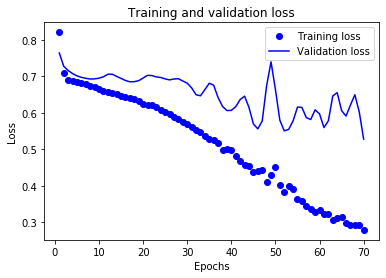

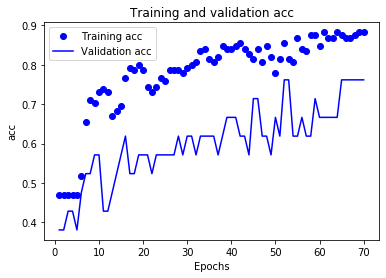

Test loss : 59.619539976119995 %
Test accuracy : 73.8095223903656 %


In [15]:
batch_size = 128 # 512 #256  #128
epochs = 70 # 230
drop_ratio = 0.002 #0.02 #0.03 #0.04 # 0.03  #0.001
training_Validation(batch_size,epochs,drop_ratio)

# training on (k-fold on,training & Validation)

In [16]:
# split in training 80%, test 20% test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(variety, label, test_size=0.2, random_state=1)

def kfold_training_Validation(batch_size,epochs,drop_ratio,split):
    print("batch_size :",batch_size,"\n","epochs :",epochs,"\n","drop_ratio :",drop_ratio) 
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, input_shape=(60,)),
        tf.keras.layers.Dropout(drop_ratio),
        tf.keras.layers.Dense(48, activation='relu'),
        tf.keras.layers.Dense(12, activation='relu'),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
        ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    from sklearn.model_selection import KFold
    kf = KFold(n_splits=split)
    kf.get_n_splits()
    
    # K-fold not using correctly
    
    for train_index, test_index in kf.split(x_train):
        x_train1, x_test1 = x_train[train_index], x_train[test_index]
        y_train1, y_test1 = y_train[train_index], y_train[test_index] 

    history = model.fit(x_train1, y_train1,batch_size=batch_size,epochs=epochs,verbose=1)
    
    
    evaluation = model.evaluate(x_test1,  y_test1,batch_size=batch_size, verbose=2)
    print()
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #return model

In [17]:
# Training and Validation (K-Fold)
batch_size = 128 #512  #128 # 32 , 128 , 256
epochs = 130
drop_ratio = 0.001 # 0.001    # 0.001, 0.9, 0.75, 0.75, 0.5, 0.5, 0.5
split = 6
kfold_training_Validation(batch_size,epochs,drop_ratio,split)

batch_size : 128 
 epochs : 130 
 drop_ratio : 0.001
Train on 139 samples
Epoch 1/130
139/139 [==============================] - 1s 6ms/sample - loss: 0.6964 - accuracy: 0.4460
Epoch 2/130
139/139 [==============================] - 0s 72us/sample - loss: 0.6724 - accuracy: 0.6331
Epoch 3/130
139/139 [==============================] - 0s 72us/sample - loss: 0.6547 - accuracy: 0.6763
Epoch 4/130
139/139 [==============================] - 0s 72us/sample - loss: 0.6435 - accuracy: 0.6547
Epoch 5/130
139/139 [==============================] - 0s 65us/sample - loss: 0.6328 - accuracy: 0.6547
Epoch 6/130
139/139 [==============================] - 0s 65us/sample - loss: 0.6233 - accuracy: 0.6691
Epoch 7/130
139/139 [==============================] - 0s 58us/sample - loss: 0.6177 - accuracy: 0.6763
Epoch 8/130
139/139 [==============================] - 0s 72us/sample - loss: 0.6132 - accuracy: 0.6835
Epoch 9/130
139/139 [==============================] - 0s 58us/sample - loss: 0.6029 - accuracy

139/139 [==============================] - 0s 58us/sample - loss: 0.3005 - accuracy: 0.8921
Epoch 79/130
139/139 [==============================] - 0s 65us/sample - loss: 0.3010 - accuracy: 0.8849
Epoch 80/130
139/139 [==============================] - 0s 108us/sample - loss: 0.2966 - accuracy: 0.8849
Epoch 81/130
139/139 [==============================] - 0s 79us/sample - loss: 0.2964 - accuracy: 0.8921
Epoch 82/130
139/139 [==============================] - 0s 93us/sample - loss: 0.2947 - accuracy: 0.8777
Epoch 83/130
139/139 [==============================] - 0s 101us/sample - loss: 0.2952 - accuracy: 0.8705
Epoch 84/130
139/139 [==============================] - 0s 86us/sample - loss: 0.2920 - accuracy: 0.8705
Epoch 85/130
139/139 [==============================] - 0s 72us/sample - loss: 0.2934 - accuracy: 0.8777
Epoch 86/130
139/139 [==============================] - 0s 79us/sample - loss: 0.2985 - accuracy: 0.8777
Epoch 87/130
139/139 [==============================] - 0s 86us/sa

# Normalizing Features & One hot encoding on Labels

In [18]:
print(variety)

[[0.0299 0.0688 0.0992 ... 0.013  0.0115 0.0015]
 [0.0131 0.0201 0.0045 ... 0.0066 0.0029 0.0053]
 [0.0116 0.0744 0.0367 ... 0.0044 0.0057 0.0035]
 ...
 [0.0095 0.0308 0.0539 ... 0.003  0.0031 0.0033]
 [0.043  0.0902 0.0833 ... 0.0162 0.0059 0.0021]
 [0.0203 0.0121 0.038  ... 0.0036 0.0013 0.0016]]


In [19]:
# normalizing data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
variety = scale.fit_transform(variety)
print(type(variety))
print(variety.shape)
print()
print(variety)

<class 'numpy.ndarray'>
(208, 60)

[[ 0.03209239  0.92344601  1.44429074 ...  0.78257679  0.57709408
  -0.99766417]
 [-0.70039396 -0.55767038 -1.02599635 ... -0.20901489 -0.81753695
  -0.24053142]
 [-0.76579453  1.09375919 -0.18604657 ... -0.54987454 -0.36347104
  -0.59917325]
 ...
 [-0.85735533 -0.23225056  0.26262226 ... -0.76678522 -0.78510367
  -0.63902234]
 [ 0.60325735  1.57428566  1.02953293 ...  1.27837263 -0.33103776
  -0.8781169 ]
 [-0.38647124 -0.80097492 -0.15213555 ... -0.6738235  -1.07700319
  -0.97773963]]


In [20]:
print(label)

[0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


In [21]:
# one hot encoding
label = tf.keras.utils.to_categorical(label)
print(label)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 

In [22]:
# split in training 70%, validation 10 %,  test 20% test 
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(variety, label, test_size=0.2, random_state=1)
# 
#x_train, x_val, y_train, y_val = train_test_split(variety, label, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=1)

print("train :",x_train.shape)
print("train label :",y_train.shape)
print("test :",x_test.shape)
print("test label:",y_test.shape)
print("validation :",x_val.shape)
print("validation label :",y_val.shape)

train : (145, 60)
train label : (145, 2)
test : (42, 60)
test label: (42, 2)
validation : (21, 60)
validation label : (21, 2)


In [23]:
#  training on (training & Validation)

def training_Validation(batch_size,epochs,drop_ratio):
    print("batch_size :",batch_size,"\n","epochs :",epochs,"\n","drop_ratio :",drop_ratio) 
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(60,)),
    tf.keras.layers.Dropout(drop_ratio),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')  # softmax # sigmoid
    ])
    
    model.compile(optimizer='adam', # adam # RMSprop
              loss='categorical_crossentropy', # sparse_categorical_crossentropy
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, y_val))
    evaluation = model.evaluate(x_test,  y_test,batch_size=batch_size, verbose=2)
    print()
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #Plotting the training and validation loss

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()
    
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #Predictoin
    #prediction = model.predict_classes(x_test)[0]
    #print(prediction)
    #print(y_test[0])
    
    #return model

batch_size : 128 
 epochs : 35 
 drop_ratio : 0.001
Train on 145 samples, validate on 21 samples
Epoch 1/35
145/145 [==============================] - 2s 13ms/sample - loss: 1.1273 - accuracy: 0.4414 - val_loss: 0.7976 - val_accuracy: 0.6190
Epoch 2/35
145/145 [==============================] - 0s 503us/sample - loss: 0.6224 - accuracy: 0.6621 - val_loss: 0.7391 - val_accuracy: 0.6190
Epoch 3/35
145/145 [==============================] - 0s 717us/sample - loss: 0.4357 - accuracy: 0.8069 - val_loss: 0.7028 - val_accuracy: 0.6190
Epoch 4/35
145/145 [==============================] - 0s 579us/sample - loss: 0.3482 - accuracy: 0.8621 - val_loss: 0.6782 - val_accuracy: 0.6190
Epoch 5/35
145/145 [==============================] - 0s 372us/sample - loss: 0.2821 - accuracy: 0.8966 - val_loss: 0.6627 - val_accuracy: 0.6667
Epoch 6/35
145/145 [==============================] - 0s 434us/sample - loss: 0.2447 - accuracy: 0.9379 - val_loss: 0.6518 - val_accuracy: 0.6667
Epoch 7/35
145/145 [========

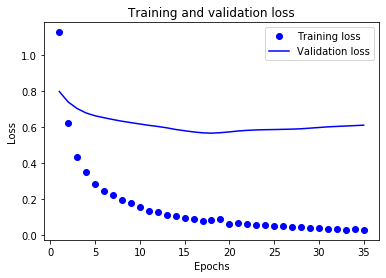

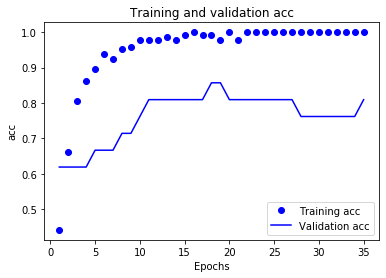

Test loss : 40.764209628105164 %
Test accuracy : 83.33333134651184 %


In [24]:
batch_size =  128   # 512 #256  #128
epochs = 35 # 60 # 230
drop_ratio = 0.001 #0.02 #0.03 #0.04 # 0.03  #0.001
training_Validation(batch_size,epochs,drop_ratio)

In [25]:
# K-Fold

# split in training 80%, test 20% test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(variety, label, test_size=0.2, random_state=1)

def kfold_training_Validation(batch_size,epochs,drop_ratio,split):
    print("batch_size :",batch_size,"\n","epochs :",epochs,"\n","drop_ratio :",drop_ratio) 

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(60,)),
    tf.keras.layers.Dropout(drop_ratio),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')  # softmax # sigmoid
    ])
    
    model.compile(optimizer='adam', # adam # RMSprop
              loss='categorical_crossentropy', # sparse_categorical_crossentropy
              metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, y_val))
    evaluation = model.evaluate(x_test,  y_test,batch_size=batch_size, verbose=2)
    print()
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    #return model

    #Predictoin
    a = 41
    prediction = model.predict_classes(x_test)[a]
    print("Predicted value :",prediction)
    #print(y_test[a])
    
    from numpy import argmax
    print("actual value :",argmax(tf.keras.utils.to_categorical(prediction, a)))

In [26]:
# Training and Validation (K-Fold)
batch_size = 128 #512  #128 # 32 , 128 , 256
epochs = 20
drop_ratio = 0.001 # 0.001    # 0.001, 0.9, 0.75, 0.75, 0.5, 0.5, 0.5
split = 3
kfold_training_Validation(batch_size,epochs,drop_ratio,split)

batch_size : 128 
 epochs : 20 
 drop_ratio : 0.001
Train on 166 samples, validate on 21 samples
Epoch 1/20
166/166 [==============================] - 2s 11ms/sample - loss: 0.8780 - accuracy: 0.5241 - val_loss: 0.6140 - val_accuracy: 0.6190
Epoch 2/20
166/166 [==============================] - 0s 331us/sample - loss: 0.5157 - accuracy: 0.7590 - val_loss: 0.5575 - val_accuracy: 0.7619
Epoch 3/20
166/166 [==============================] - 0s 319us/sample - loss: 0.3826 - accuracy: 0.8434 - val_loss: 0.5111 - val_accuracy: 0.8095
Epoch 4/20
166/166 [==============================] - 0s 337us/sample - loss: 0.3011 - accuracy: 0.9096 - val_loss: 0.4687 - val_accuracy: 0.8095
Epoch 5/20
166/166 [==============================] - 0s 349us/sample - loss: 0.2484 - accuracy: 0.9217 - val_loss: 0.4326 - val_accuracy: 0.8571
Epoch 6/20
166/166 [==============================] - ETA: 0s - loss: 0.2268 - accuracy: 0.93 - 0s 361us/sample - loss: 0.2133 - accuracy: 0.9398 - val_loss: 0.4013 - val_acc